In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA


df = pd.read_csv("breast-cancer.csv") 


df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}) 


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [22]:
# Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)


SVC()

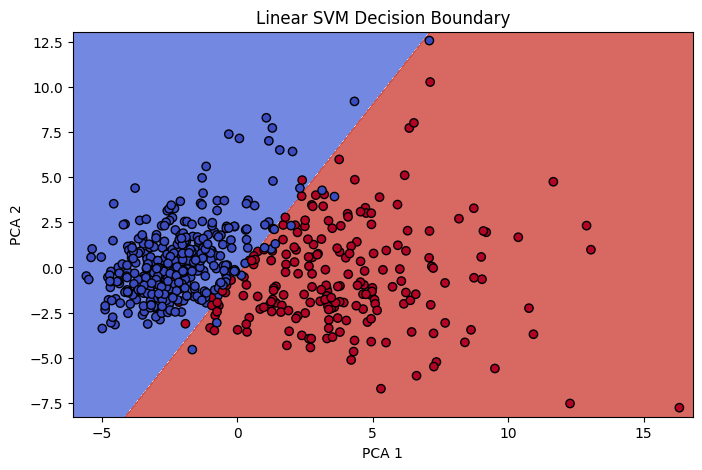

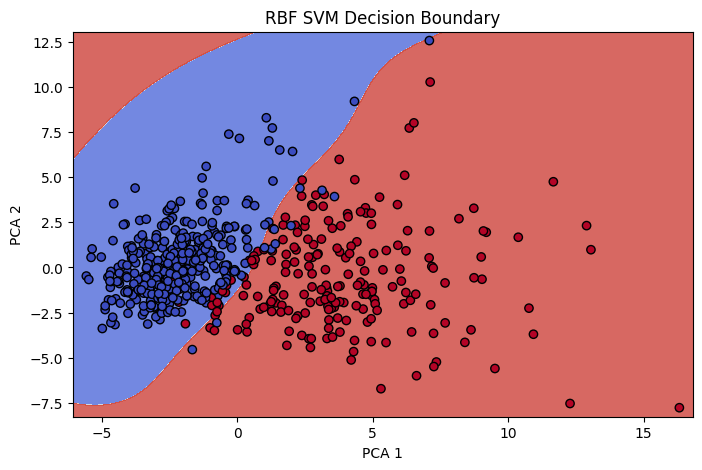

In [23]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_decision_boundary(svm_linear, X_pca, y, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf, X_pca, y, "RBF SVM Decision Boundary")


In [24]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_pca, y)

print("Best parameters:", grid.best_params_)


Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [25]:
best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_pca, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [0.92982456 0.95614035 0.92982456 0.94736842 0.95575221]
Mean Accuracy: 0.9437820214252446
